# Overview
In this notebook we are going to use a classification algorithm to predict animal disease.
This wasdataset obtained fron kaggle and contains data about #nt animals but we are going to focus on cow.


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from category_encoders import  OrdinalEncoder
import matplotlib.pyplot as plt


# Data Preparetion

### import


let create a function that we will be using for data clearning 

In [3]:
def wrangle(path):
    dataset = pd.read_csv(path)
    return dataset

In [4]:
# importing dataset

df = wrangle("datasets/animal_disease_dataset.csv")
df.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


### Explore

lets explore out dataset and see what data it holds

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43778 entries, 0 to 43777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       43778 non-null  object 
 1   Age          43778 non-null  int64  
 2   Temperature  43778 non-null  float64
 3   Symptom 1    43778 non-null  object 
 4   Symptom 2    43778 non-null  object 
 5   Symptom 3    43778 non-null  object 
 6   Disease      43778 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.3+ MB


(43778, 7)

In [6]:
# sitatistical summary for fields with numbers (age and temperature)
df.select_dtypes('number').describe()

,Age,Temperature
count,43778.000000,43778.000000
mean,6.769131,102.269590
std,3.886739,1.400872
min,1.000000,100.000000
25%,4.000000,101.100000
50%,7.000000,102.200000
75%,10.000000,103.400000
max,15.000000,105.000000


In [7]:
# counting for unique values in each column
df.select_dtypes('object').nunique()

Animal        4
Symptom 1    24
Symptom 2    24
Symptom 3    24
Disease       5
dtype: int64

looking at the result of the above cell, we can see that we have 4 distinct animals in `"Animal"` column
and remember that we are only intrested in data about cow. From here we can modify our wrangle function to only return to use cow`s data or we can do it separetly.

since there in no much of data clearning work in this dataset, i have decided to extract data abut cow outside the `"wrangle"` function

In [8]:
# subseting the dataset to get only data related to cow

cow_df = df[df['Animal'] == 'cow']
cow_df.head()

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
11,cow,11,103.9,depression,painless lumps,loss of appetite,lumpy virus
19,cow,14,102.7,shortness of breath,sweats,chills,anthrax
20,cow,1,103.7,depression,loss of appetite,painless lumps,lumpy virus


now our exploration will continue on our subset `"cow_df"`

In [9]:
# let print the shape of our new dataset
print('cow data shape', cow_df.shape)


cow data shape (11254, 7)


### split

now let split our datset into feature matrix `X` and target vector `y`

In [10]:
# creating feature
X = cow_df.drop(columns=['Animal','Disease'])
X.head()

,Age,Temperature,Symptom 1,Symptom 2,Symptom 3
0,3,103.1,depression,painless lumps,loss of appetite
3,14,100.3,loss of appetite,swelling in limb,crackling sound
11,11,103.9,depression,painless lumps,loss of appetite
19,14,102.7,shortness of breath,sweats,chills
20,1,103.7,depression,loss of appetite,painless lumps


In [11]:
# creating target vector

y=cow_df[cow_df.columns[-1]]
y.shape

(11254,)

Dividing our data (X and y) into training and test sets using a randomized train-test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2, random_state=42
)


let devide our training data (X_train and y_train) into training and validation sets using a randomized train-test split.

In [13]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

### Model Build

#### Baseline

let Calculate the baseline accuracy score for our model.
baseline prediction for our model will be the desease with most counts

In [14]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.22


### Iterate

In [15]:
# creating pipeline
model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state=42)
)

# fitting our model
model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Symptom 1', 'Symptom 2', 'Symptom 3'],
                                mapping=[{'col': 'Symptom 1',
                                          'data_type': dtype('O'),
                                          'mapping': painless lumps              1
depression                  2
sweats                      3
chills                      4
loss of appetite            5
shortness of breath         6
lameness                    7
swelling in muscle          8
blisters on gums            9
crackling sound            10
fatigue                    11
difficulty walking         12
swelling in abdomen        13
swelling in extremities    14
sw...
chest discomfort            8
crackling sound             9
loss of appetite           10
lameness                   11
fatigue                    12
sweats                     13
blisters on gums           14
sores on gums              15
blisters on mouth          16
swelling in extremities    17
blisters on hooves         18
shortness of breath        19
swelling in muscle         20
swelling in limb           21
sores on hooves            22
blisters on tongue         23
sores on tongue            24
NaN                        -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Now let calculate the accuracy of our model on traing, test and validation data


In [16]:
accuracy_train = model.score(X_train,y_train)
accuracy_test = model.score(X_test,y_test)
accuracy_val = model.score(X_val,y_val)

print("Training Accuracy:", round(accuracy_train, 2))
print("Test Accuracy:", round(accuracy_test, 2))
print("Validation Accuracy:", round(accuracy_val, 2))

Training Accuracy: 0.95
Test Accuracy: 0.79
Validation Accuracy: 0.78


looking at our accuracy score we can tell that our model is performing well on test and validation data

now let explore our model to see its depth

In [17]:
depth = model.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

24


as we can see our tree has depth of `24` and it is performing well, but we can ask ourself something like, is this the best score our model can give or is this the best depth ??

so,let find the answers.

In [18]:
tree_depth = range(1,50,2)

In [19]:
# lett create 3 lists to store our trainning,test and validation scores 
trainning_acc = []
test_acc = []
validation_acc = []

# let create a for loop to generate all those accuracy score

for d in tree_depth:
    # creating our modified pipeline
    modified_model = make_pipeline(
        OrdinalEncoder(),
        DecisionTreeClassifier(max_depth=d, random_state=42)
    )
    
    # let fit our model
    modified_model.fit(X_train,y_train)
    
    # accuracy calculations
    trainning_acc.append(modified_model.score(X_train,y_train))
    test_acc.append(modified_model.score(X_test,y_test))
    validation_acc.append(modified_model.score(X_val,y_val))

now let plot them on graph for visual representation

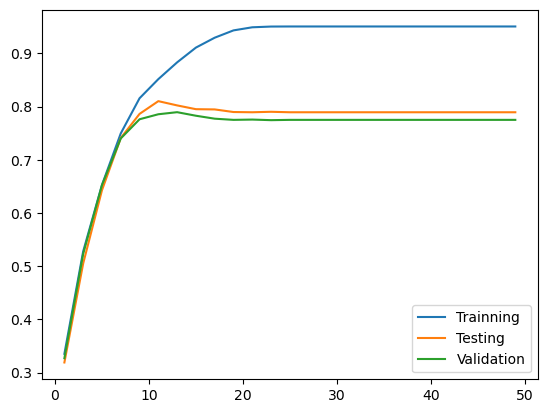

In [20]:
plt.plot(tree_depth,trainning_acc,label='Trainning')
plt.plot(tree_depth,test_acc,label='Testing')
plt.plot(tree_depth,validation_acc,label='Validation')
plt.legend();

In [21]:
# let find out which depth scored high
for i,j in zip(validation_acc,tree_depth):
    print(j,i)

1 0.32704053303720154
3 0.5230427540255413
5 0.6524153248195447
7 0.7401443642420877
9 0.77623542476402
11 0.7856746252082176
13 0.7895613548028872
15 0.7828983897834536
17 0.7773459189339256
19 0.7751249305941144
21 0.7756801776790672
23 0.7745696835091616
25 0.7751249305941144
27 0.7751249305941144
29 0.7751249305941144
31 0.7751249305941144
33 0.7751249305941144
35 0.7751249305941144
37 0.7751249305941144
39 0.7751249305941144
41 0.7751249305941144
43 0.7751249305941144
45 0.7751249305941144
47 0.7751249305941144
49 0.7751249305941144


now let us create our final model, by setting our max_dept to `13`

In [22]:
final_model = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=13,random_state=42)
)
final_model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Symptom 1', 'Symptom 2', 'Symptom 3'],
                                mapping=[{'col': 'Symptom 1',
                                          'data_type': dtype('O'),
                                          'mapping': painless lumps              1
depression                  2
sweats                      3
chills                      4
loss of appetite            5
shortness of breath         6
lameness                    7
swelling in muscle          8
blisters on gums            9
crackling sound            10
fatigue                    11
difficulty walking         12
swelling in abdomen        13
swelling in extremities    14
sw...
chest discomfort            8
crackling sound             9
loss of appetite           10
lameness                   11
fatigue                    12
sweats                     13
blisters on gums           14
sores on gums              15
blisters on mouth          16
swelling in extremities    17
blisters on hooves         18
shortness of breath        19
swelling in muscle         20
swelling in limb           21
sores on hooves            22
blisters on tongue         23
sores on tongue            24
NaN                        -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=13, random_state=42))])

In [23]:
# validation score of our final model

final_model.score(X_val,y_val).round(2)

0.79

### testing our model with random data

In [57]:
def transf(Age,Temperature,Symptom1,Symptom2,Symptom3):
    y =pd.DataFrame([{
    'Age':Age,
    'Temperature':Temperature,
    'Symptom 1':Symptom1,
    'Symptom 2':Symptom2,
    'Symptom 3':Symptom3}])
    return y

result = final_model.predict(transf(3,101.4,'shortness of breath','sweats','chills'))[0]
print('Predicted disease:',result)

Predicted disease: anthrax
